# Μέρος 1. UCI dataset - U04: Parkinsons

## Εισαγωγή και επισκόπηση


Παρακάτω γίνεται η εισαγωγλη του dataset στο notebook και η εκτύπωση των πρώτων γραμμών του.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'

#if we want to print the whole file
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None) 

data=pd.read_csv(url)
print(data.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]


###**Σύντομη παρουσίαση του dataset δηλαδή ποιο είναι το πρόβλημα που περιγράφει.**

Το συγκεκριμένο dataset αποτελείται από ένα σύνολο φωνητικών καταγραφών από 31 ανθρώπους, 23 από τους οποίους πάσχουν από τη νόσο Parkinson's (PD). Κάθε στήλη του πίνακα αφορά μία συγκεκριμένη παράμετρο της φωνητικής μέτρησης και κάθε γραμμή αντιστοιχεί σε μία από τις 195 καταγραφές από τους ασθενείς, των οποίων το όνομα φαίνεται στη στήλη 1. 

Στόχος των δεδομένων είναι ο διαχωρισμός (ταξινόμηση) του υγιείς από τους ασθενείς με νόσο Parkinson's με βάση τη στήλη "status", η οποία περιέχει την τιμή 0 για τους υγιείς ανθρώπους και 1 για τους ασθενείς που έχουν τη νόσο.

Τα δεδομένα είναι σε μορφή ASCII CSV. Οι γράμμες του αρχείου CSV περιλαμβάνουν ένα στιγμιότυπο που αντιστοιχεί σε μία φωνητική καταγραφή. Υπάρχουν περίπου 6 καταγραφές ανά ασθενή, το όνομα του οποίου φαίνεται στην πρώτη στήλη "name".


###**Χρειάστηκε να κάνετε μετατροπές στα αρχεία plain text για την εισαγωγή του; αν ναι, ποιες είναι αυτές;**

Δεν χρειάστηκε κάποια μετατροπή για την εισαγωγή του dataset.

###**Δώστε το πλήθος δειγμάτων και χαρακτηριστικών, και το είδος όλων των χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;**
Το dataset αποτελείται από 195 δείγματα φωνητικών καταγραφών και το πλήθος των χαρακτηριστικών που περιλαμβάνει είναι 23. 

Τα χαρακτηριστικά είναι τα εξής: 
MDVP:Fo(Hz) - Μέση θεμελιώδης φωνητική συχνότητα

MDVP:Fhi(Hz) - Μέγιστη θεμελιώδης φωνητική συχνότητα

MDVP:Flo(Hz) - Ελάχιστη θεμελιώδης φωνητική συχνότητα

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Μερικές μετρικές διακύμανσης στη θεμελιώδη συχνότητα

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Μερικές μετρικές διακύμανσης στο πλάτος 

NHR,HNR - Δύο μετρικές αναλογίας θορύβου προς τονικά στοιχεία στη φωνή
status - Ένδειξη (label) για το αν ο ασθενής έχει τη νόσο (status=1) ή δεν έχει τη νόσο (status=0)

RPDE,D2 - Δύο μη γραμμικές μετρικές δυναμικής πολυπλοκότητας

DFA - Εκθέτης κλιμάκωσης φράκταλ σήματος

spread1,spread2,PPE - Τρία μη γραμμικά μέτρα διακύμανσης θεμελιωδών συχνοτήτων

Δεν υπάρχουν στο dataset μη διατεταγμένα χαρακτηριστικά.

###**Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**
Σε κάθε στήλη υπάρχει επικεφαλίδα που αντιστοιχεί στο όνομα του χαρακτηριστικού που αφορά η στήλη και οι γραμμές είναι αριθμημένες από το 0 έως το 194 (195 δείγματα φωντητικών καταγραφών).


###**Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**
Οι ετικέτες των κλάσεων "Υγιής" και "PD" παίρνουν τιμές 0 και 1 αντίστοιχα. Οι ετικέτες βρίσκονται στη στήλη status που είναι η στήλη 17 (μετρώντας από τη στήλη 0 που περιέχει τα ονόματα των ασθενών).

###**Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;**

Εκτυπώνοντας ολόκληρο το dataset παρατηρήσαμε πως δεν υπάρχουν απουσιάζουσες τιμές.

###**Ποιο είναι το πλήθος των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε αν το dataset είναι ισορροπημένο ή όχι.**

Υπάρχουν 2 κλάσεις στο συγκεκριμένο dataset ("Υγιής" και "PD"). Από τους 31 ασεθενείς που εξετάζει το dataset, οι 23 (74.2%) ανήκουν στην κλάση "PD" και οι υπόλοιποι 8 (25.8%) ανήκουν στην κλάση "Υγιής".
Το dataset **δεν είναι ισορροπημένο**, καθώς τα δείγματα της κλάσης "PD" είναι σχεδόν τριπλάσια από αυτά της κλάσης μειοψηφίας ("Υγιής").

##Προετοιμασία

###**Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set) με 30% των δειγμάτων στο test set. Αν το dataset σας είναι από την περιγραφή του ήδη χωρισμένο σε train και test, εφόσον τα ποσοστά είναι κοντά στο 70-30 μπορείτε να τα χρησιμοποιήσετε ως έχουν. Αν δεν είναι, ενοποιήστε train και test και προχωρήστε στο ίδιο split.**

###**Αν υπάρχουν απουσιάζουσες τιμές διαχειριστείτε τες και αιτιολογήστε.**
Δεν υπάρχουν απουσιάζουσες τιμές.

###**Διαχειριστείτε τυχόν κατηγορικά ή/και μη διατεταγμένα χαρακτηριστικά και αιτιολογήστε.**

Υπάρχει το κατηγορικό χαρακτηριστικό "name" που αφορά το όνομα του ασθενή και βρίσκεται στην 1η στήλη. Η στήλη αυτή έχουμε φροντίσει ώστε να μην συμπεριλαμβάνεται στο train set και στο test set.

Επειδή οι ασθενείς είναι 31, αλλά τα δείγματα από τις φωνητικές καταγραφές είναι 195, δηλαδή αντιστοιχούν 6 περίπου καταγραφές σε κάθε ασθενή, πρέπει να φορντίσουμε ώστε όλες οι καταγραφές ενός ασθενή να βρίσκονται είτε στο test ή είτε στο train set. Επομένως, δεν μπορεί να γίνει τυχαίος χωρισμός σε train και test set, διότι δεν θέλουμε να υπάρξει ασθενής, του οποίου μερικές καταγραφές βρίσκονται στο train set και οι υπόλοιπες στο test set. 
Αυτό συμβαίνει, διότι θέλουμε να ταξινομήσουμε τους ασθενείς και όχι τις φωνητικές καταγραφές στις 2 κλάσεις.

In [ ]:
labels = data.loc[:,'status']
features = data.drop(['status'], axis=1)

In [ ]:
#we manually split the dataset into train and test set
#train set - 70% = 22 patients, test set - 30% = 9 patients

train = data.iloc[0:140, 1:]
test = data.iloc[140:, 1:]
train_labels = labels.iloc[0:140]
test_labels = labels.iloc[140:]

##Ταξινόμηση

### Out-of-the-box προσέγγιση

####**Ταξινομητές Dummy**

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

In [ ]:
classifiers_accuracy = {}
classifiers_f1 = {}
classifiers_time = {}

Dummy Classifier με strategy=uniform

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
start_time = time.time()
#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
model = dc_uniform.fit(train, train_labels)

#με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
preds = dc_uniform.predict(test)
classifiers_time['Uniform (random)'] = (time.time() - start_time)
print("Uniform predictions:",preds)

classifiers_accuracy['Uniform (random)'] = accuracy_score(test_labels, preds)
print("Uniform Accuracy Score:",accuracy_score(test_labels, preds))

classifiers_f1['Uniform (random)'] = f1_score(test_labels, preds)
print("Uniform F1 Score:",f1_score(test_labels, preds))

Uniform predictions: [1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0]
Uniform Accuracy Score: 0.6181818181818182
Uniform F1 Score: 0.631578947368421


Dummy Classifier με strategy=constant(0)

In [ ]:
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
start_time=time.time()
model = dc_constant_0.fit(train, train_labels)

preds = dc_constant_0.predict(test)
classifiers_time['Constant 0'] = (time.time() - start_time)
print("Constant 0 predictions:",preds)

classifiers_accuracy['Constant 0'] = accuracy_score(test_labels, preds)
print("Constant 0 Accuracy Score:",accuracy_score(test_labels, preds))

classifiers_f1['Constant 0'] = f1_score(test_labels, preds)
print("Constant 0 F1 Score:",f1_score(test_labels, preds))

Constant 0 predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Constant 0 Accuracy Score: 0.43636363636363634
Constant 0 F1 Score: 0.0


Dummy Classifier με strategy=constant(1)

In [ ]:
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
start_time=time.time()
model = dc_constant_1.fit(train, train_labels)

preds = dc_constant_1.predict(test)
classifiers_time['Constant 1'] = (time.time() - start_time)
print("Constant 1 predictions:",preds)

classifiers_accuracy['Constant 1'] = accuracy_score(test_labels, preds)
print("Constant 1 Accuracy Score:",accuracy_score(test_labels, preds))

classifiers_f1['Constant 1'] = f1_score(test_labels, preds)
print("Constant 1 F1 Score:",f1_score(test_labels, preds))

Constant 1 predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Constant 1 Accuracy Score: 0.5636363636363636
Constant 1 F1 Score: 0.7209302325581396


Dummy Classifier με strtegy=most frequent

In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
start_time=time.time()
model = dc_most_frequent.fit(train, train_labels)

preds = dc_most_frequent.predict(test)
classifiers_time['Most Frequent'] = (time.time() - start_time)
print("Most Frequent predictions:",preds)

classifiers_accuracy['Most Frequent'] = accuracy_score(test_labels, preds)
print("Most Frequent Accuracy Score:",accuracy_score(test_labels, preds))

classifiers_f1['Most Frequent'] = f1_score(test_labels, preds)
print("Most Frequent F1 Score:",f1_score(test_labels, preds))

Most Frequent predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Most Frequent Accuracy Score: 0.5636363636363636
Most Frequent F1 Score: 0.7209302325581396


Dummy Classifier με strategy=stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
start_time=time.time()
model = dc_stratified.fit(train, train_labels)

preds = dc_stratified.predict(test)
classifiers_time['Stratified'] = (time.time() - start_time)
print("Constant 1 predictions:",preds)

classifiers_accuracy['Stratified'] = accuracy_score(test_labels, preds)
print("Constant 1 Accuracy Score:",accuracy_score(test_labels, preds))

classifiers_f1['Stratified'] = f1_score(test_labels, preds)
print("Constant 1 F1 Score:",f1_score(test_labels, preds))

Constant 1 predictions: [1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1]
Constant 1 Accuracy Score: 0.4909090909090909
Constant 1 F1 Score: 0.631578947368421


In [ ]:
print("{:<25} {:<30} {:<30}".format('Dummy Classifier', 'Accuracy', 'F1'))
label=[]
label2=[]
num_ac=[]
num_f1=[]
for i in range (len(classifiers_accuracy.keys())):
  for k, v in classifiers_accuracy.items():
      label.append(k)
      num_ac.append(v)
  for m, l in classifiers_f1.items():
      label2.append(m)
      num_f1.append(l) 
  print("{:<25} {:<30} {:<30}".format(label[i], num_ac[i], num_f1[i]))

Dummy Classifier          Accuracy                       F1                            
Uniform (random)          0.6181818181818182             0.631578947368421             
Constant 0                0.43636363636363634            0.0                           
Constant 1                0.5636363636363636             0.7209302325581396            
Most Frequent             0.5636363636363636             0.7209302325581396            
Stratified                0.4909090909090909             0.631578947368421             


Παρατηρούμε ότι όλοι οι Dummy Classifiers έχουν σχετικά χαμηλό accuracy (<57%)

####**Gaussian Naive Bayes (GNB)**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
start_time = time.time()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

classifiers_time['Out of the Box GNB'] = (time.time() - start_time)

#Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
classifiers_accuracy['Gaussian Naive Bayes'] = accuracy_score(test_labels, preds)
print("Gaussian Naive Bayes Accuracy Score:",accuracy_score(test_labels, preds),'\n')
classifiers_f1['Gaussian Naive Bayes'] = f1_score(test_labels, preds)
print("Gaussian Naive Bayes F1 Score:",f1_score(test_labels, preds),'\n\n')

Συνολικός χρόνος fit και predict: 0.006203651428222656 seconds
Gaussian Naive Bayes Accuracy Score: 1.0 

Gaussian Naive Bayes F1 Score: 1.0 




####**KNearestNeighbors (kNN)**

##### for k=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(train, train_labels)
preds=(knn.predict(test))

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

classifiers_time['Out of the Box KNN with neighbours=3'] = (time.time() - start_time)
  
  # Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, preds)

classifiers_accuracy['KNN with neighbours=3'] = accuracy_score(test_labels, preds)
print("KNN_3 Accuracy Score:",accuracy_score(test_labels, preds),'\n')

classifiers_f1['KNN with neighbours=3'] = f1_score(test_labels, preds)
print("KNN_3 F1 Score:",f1_score(test_labels, preds),'\n\n')

Συνολικός χρόνος fit και predict: 0.01227569580078125 seconds
KNN_3 Accuracy Score: 0.6181818181818182 

KNN_3 F1 Score: 0.7272727272727272 




#####for k=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn.fit(train, train_labels)
preds=(knn.predict(test))

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

classifiers_time['Out of the Box KNN with neighbours=5'] = (time.time() - start_time)
  # Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, preds)

classifiers_accuracy['KNN with neighbours=5'] = accuracy_score(test_labels, preds)
print("KNN_5 Accuracy Score:",accuracy_score(test_labels, preds),'\n')

classifiers_f1['KNN with neighbours=5'] = f1_score(test_labels, preds)
print("KNN_5 F1 Score:",f1_score(test_labels, preds),'\n\n')

Συνολικός χρόνος fit και predict: 0.012619256973266602 seconds
KNN_5 Accuracy Score: 0.6181818181818182 

KNN_5 F1 Score: 0.7341772151898733 




#####for k=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
start_time = time.time()
knn.fit(train, train_labels)
preds=(knn.predict(test))

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

classifiers_time['Out of the Box KNN with neighbours=9'] = (time.time() - start_time)
  
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, preds)

classifiers_accuracy['KNN with neighbours=9'] = accuracy_score(test_labels, preds)
print("KNN_9 Accuracy Score:",accuracy_score(test_labels, preds),'\n')

classifiers_f1['KNN with neighbours=9'] = f1_score(test_labels, preds)
print("KNN_9 F1 Score:",f1_score(test_labels, preds),'\n\n')

Συνολικός χρόνος fit και predict: 0.01339864730834961 seconds
KNN_9 Accuracy Score: 0.6363636363636364 

KNN_9 F1 Score: 0.7560975609756097 




#####for k=13

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
start_time = time.time()
knn.fit(train, train_labels)
preds=(knn.predict(test))

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

classifiers_time['Out of the Box KNN with neighbours=13'] = (time.time() - start_time)
  
  # Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, preds)

classifiers_accuracy['KNN with neighbours=13'] = accuracy_score(test_labels, preds)
print("KNN_13 Accuracy Score:",accuracy_score(test_labels, preds),'\n')

classifiers_f1['KNN with neighbours=13'] = f1_score(test_labels, preds)
print("KNN_13 F1 Score:",f1_score(test_labels, preds),'\n\n')

Συνολικός χρόνος fit και predict: 0.015090703964233398 seconds
KNN_13 Accuracy Score: 0.6181818181818182 

KNN_13 F1 Score: 0.7407407407407407 




####**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter=500)
start_time = time.time()
lr.fit(train, train_labels)
lr_pred = lr.predict(test)

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

classifiers_time['Out of the Box Logistic Regression'] = (time.time() - start_time)

classifiers_accuracy['Logistic Regression'] = accuracy_score(test_labels, lr_pred)
print("Logistic Regression Accuracy Score:",accuracy_score(test_labels, lr_pred),'\n')

classifiers_f1['Logistic Regression'] = f1_score(test_labels, lr_pred)
print("Logistic Regression F1 Score:",f1_score(test_labels, lr_pred),'\n\n')


Συνολικός χρόνος fit και predict: 0.04213261604309082 seconds
Logistic Regression Accuracy Score: 0.6181818181818182 

Logistic Regression F1 Score: 0.7469879518072289 




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


#### Αποτελέσματα Out-of-the-box προσέγγισης

Παρακάτω φαίνεται ο συγκριτικός πίνακας όλων των ταξινομητών με τις μετρικές Accuracy και F1

In [ ]:
print("{:<25} {:<30} {:<30}".format('Classifier', 'Accuracy', 'F1'))
label=[]
label2=[]
num_ac=[]
num_f1=[]
for i in range (len(classifiers_accuracy)):
  for k, v in classifiers_accuracy.items():
      label.append(k)
      num_ac.append(v)
  for m, l in classifiers_f1.items():
      label2.append(m)
      num_f1.append(l) 
  print("{:<25} {:<30} {:<30}".format(label[i], num_ac[i], num_f1[i]))

Classifier                Accuracy                       F1                            
Uniform (random)          0.5636363636363636             0.5862068965517241            
Constant 0                0.43636363636363634            0.0                           
Constant 1                0.5636363636363636             0.7209302325581396            
Most Frequent             0.5636363636363636             0.7209302325581396            
Stratified                0.509090909090909              0.6582278481012658            
Gaussian Naive Bayes      1.0                            1.0                           
KNN with neighbours=3     0.6181818181818182             0.7272727272727272            
KNN with neighbours=5     0.6181818181818182             0.7341772151898733            
KNN with neighbours=9     0.6363636363636364             0.7560975609756097            
KNN with neighbours=13    0.6181818181818182             0.7407407407407407            
Logistic Regression       0.6181

Παρακάτω φαίνεται ο πίνακας των χρόνων του fit και του predict για κάθε έναν από τους παραπάνω ταξινομητές.

In [ ]:
print("{:<40} {:<30}".format('Classifier', 'Time'))
label3=[]
time=[]
for i in range (len(classifiers_time)):
  for k, v in classifiers_time.items():
      label3.append(k)
      time.append(v)
  print("{:<40} {:<30}".format(label3[i], time[i]))

Classifier                               Time                          
Uniform (random)                         0.0007486343383789062         
Constant 0                               0.0007612705230712891         
Constant 1                               0.0005514621734619141         
Most Frequent                            0.0005919933319091797         
Stratified                               0.001013040542602539          
Out of the Box GNB                       0.008821964263916016          
Out of the Box KNN with neighbours=3     0.013222694396972656          
Out of the Box KNN with neighbours=5     0.012847185134887695          
Out of the Box KNN with neighbours=9     0.013546466827392578          
Out of the Box KNN with neighbours=13    0.015419483184814453          
Out of the Box Logistic Regression       0.04231095314025879           


Παρακάτων φαίνεται το συγκριτικό γράφημα Bar Plot των ταξινομητών και των μετρικών Accuracy και F1

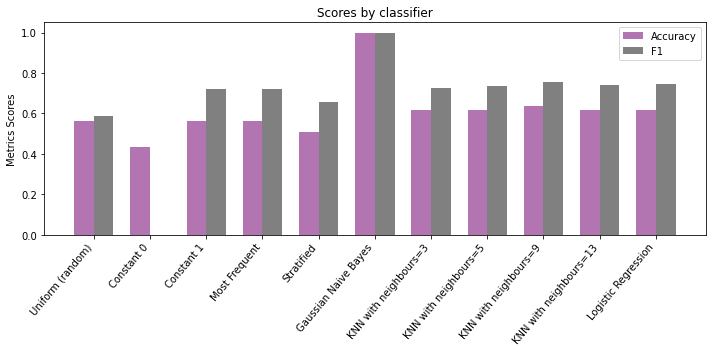

In [ ]:
import matplotlib.pyplot as plt

classifiers = list((classifiers_accuracy.keys()))
accuracy_values = list(classifiers_accuracy.values())
f1_values = list(classifiers_f1.values())

x = np.arange (len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, accuracy_values, width, color = (0.5,0.1,0.5,0.6), label='Accuracy')
rects2 = ax.bar(x + width/2, f1_values, width, color='gray', label='F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics Scores')
ax.set_title('Scores by classifier')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=50, ha='right')
ax.legend()


fig.tight_layout()

plt.show()

### Προεπεξεργασία Δεδομένων 

#### Μείωση διατάσεων με επιλογή χαρακτηριστικών Variance Threshold:

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
train_reduced_a = selector.fit_transform(train)
print(train_reduced_a)
mask_a = selector.get_support()
print(mask_a)

[[119.992    157.302     74.997    ...   0.266482   2.301442   0.284654]
 [122.4      148.65     113.819    ...   0.33559    2.486855   0.368674]
 [116.682    131.111    111.555    ...   0.311173   2.342259   0.332634]
 ...
 [113.166    130.27     100.673    ...   0.304107   2.672362   0.274387]
 [112.239    126.609    104.095    ...   0.306014   2.419253   0.209191]
 [116.15     131.731    109.815    ...   0.23307    2.445646   0.184985]]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


Για την default παράμετρο **threshold=0**, παρατηρούμε ότι όλες οι τιμές της μάσκας είναι True, επομένως, δεν υπάρχει χαρακτηριστικό που να διατηρεί σταθερή τιμή.

Δοκιμάζουμε τιμή **threshold=0.0000025** ως παράμετρο της VarianceThreshold, ώστε να μειώσουμε το πλήθος των χαρακτηριστικών:

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.0000025)
train_reduced_b = selector.fit_transform(train)
print(train_reduced_b)
mask_b = selector.get_support()
print(mask_b)

[[119.992    157.302     74.997    ...   0.266482   2.301442   0.284654]
 [122.4      148.65     113.819    ...   0.33559    2.486855   0.368674]
 [116.682    131.111    111.555    ...   0.311173   2.342259   0.332634]
 ...
 [113.166    130.27     100.673    ...   0.304107   2.672362   0.274387]
 [112.239    126.609    104.095    ...   0.306014   2.419253   0.209191]
 [116.15     131.731    109.815    ...   0.23307    2.445646   0.184985]]
[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


Παρατηρούμε ότι μόνο ένα χαρακτηριστικό έχει τιμή False στην μάσκα, επομένως θα αυξήσουμε το κατώφλι σε **threshold=0.000025**, ώστε να ελαττώσουμε περαιτέρω τις διαστάσεις του dataset.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector_final = VarianceThreshold(0.000025)
train_reduced = selector_final.fit_transform(train)
print(train_reduced)
mask_c = selector_final.get_support()
print(mask_c)

[[119.992    157.302     74.997    ...   0.266482   2.301442   0.284654]
 [122.4      148.65     113.819    ...   0.33559    2.486855   0.368674]
 [116.682    131.111    111.555    ...   0.311173   2.342259   0.332634]
 ...
 [113.166    130.27     100.673    ...   0.304107   2.672362   0.274387]
 [112.239    126.609    104.095    ...   0.306014   2.419253   0.209191]
 [116.15     131.731    109.815    ...   0.23307    2.445646   0.184985]]
[ True  True  True False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


In [ ]:
#conversion of pandas dataframe to numpy array 
test=test.values

In [ ]:
#reduce features in test set
test_reduced = test[:,mask_c]

In [ ]:
#conversion of numpy arrays to pandas dataframes
test = pd.DataFrame(test)
train_reduced=pd.DataFrame(train_reduced)
test_reduced=pd.DataFrame(test_reduced)

Αυτή τη φορά, 4 χαρακτηριστικά αφαιρέθηκαν από το σύνολο των 23. Επομένως, μειώθηκαν οι διαστάσεις του dataset και επιλέγουμε για τη συγκεκριμένη μέθοδο το κατώφλι αυτό σαν πρώτο στάδιο μείωσης των διαστάσεων.

#### Κανονικοποίηση χαρακτηριστικών με feature scaling:




In [ ]:
from sklearn import preprocessing

#conversion of pandas dataframes to numpy arrays
train_reduced=train_reduced.values
test_reduced=test_reduced.values

# το ίδιο με  min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train_reduced)
print(train_minmax, "\n\n")
test_minmax = min_max_scaler.transform(test_reduced)
print(test_minmax)

[[0.19289918 0.11340473 0.05700959 ... 0.60788876 0.39066128 0.59993504]
 [0.2075712  0.09561592 0.28946691 ... 0.76933644 0.47314522 0.80986171]
 [0.17273126 0.05955512 0.27591059 ... 0.7122943  0.40881938 0.71981461]
 ...
 [0.15130817 0.05782599 0.21075165 ... 0.69578696 0.55567097 0.57428261]
 [0.14565994 0.05029884 0.2312418  ... 0.70024203 0.44307139 0.41138831]
 [0.16948977 0.06082986 0.26549187 ... 0.52983282 0.45481274 0.35090884]] 


[[0.49984158 0.34264032 0.08423    ... 0.9145501  0.68532138 0.58137844]
 [0.72964015 0.31179157 0.15763411 ... 0.66030062 0.55245504 0.46768523]
 [0.67099475 0.24085424 0.49827253 ... 0.71129676 0.46365756 0.41306732]
 ...
 [0.52616346 0.28344501 0.05275827 ... 0.35551522 0.55896743 0.21784452]
 [0.67285921 0.60615207 0.05645272 ... 0.46998963 0.31822198 0.19680188]
 [0.76745348 0.32512496 0.0748292  ... 0.43077243 0.50367281 0.2599223 ]]


In [ ]:
#conversion of numpy arrays to pandas dataframes
train_minmax=pd.DataFrame(train_minmax)
test_minmax=pd.DataFrame(test_minmax)

#### Εξισορρόπηση του μη ισορροπημένου dataset με RandomOverSampler


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

ros = RandomOverSampler()

train_resampled, train_labels_resampled = ros.fit_resample(train_minmax,train_labels)


print(train_resampled.shape)
print(train_labels_resampled.shape)
 
print(train_labels_resampled)

summ = train_labels_resampled.T.sum(axis=0)
print(summ)
print(summ.sum())

(232, 19)
(232,)
0      1
1      1
2      1
3      1
4      1
      ..
227    0
228    0
229    0
230    0
231    0
Name: status, Length: 232, dtype: int64
116
116


#### Μείωση της διαστατικότητας με εξαγωγή χαρακτηριστικών - Ανάλυση σε Κύριες Συνιστώσες (PCA)

In [ ]:
from sklearn.decomposition import PCA

#μετά την επιλογή χαρακτηριστικών με Variance Threshold, από τα 23 χαρακτηριστικά, κρατήσαμε 19
#θα επιχειρήσουμε με εξαγωγή χαρακτηριστικών να τα ελαττώσουμε σε 16
n = 16
pca = PCA(n_components=n)

trainPCA = pca.fit_transform(train_resampled)
testPCA = pca.transform(test_minmax)

print(train_resampled.shape)
print(trainPCA.shape)
print("")
print(test_minmax.shape)
print(testPCA.shape)

# πλεόν οι διαστάση των χαρακτηριστικών είναι 16

(232, 19)
(232, 16)

(55, 19)
(55, 16)


[0.59766844 0.7309305  0.8207812  0.87116526 0.91107957 0.93421252
 0.95172216 0.96654687 0.97852263 0.98642428 0.99258487 0.99605734
 0.99782186 0.99887502 0.99932024 0.99973964]


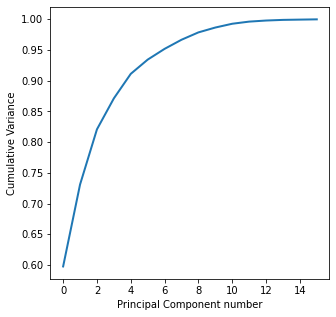

In [ ]:
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Με 16 κύριες συνιστώσες εξηγούμε 99.97% της διακύμανσης (πληοροφορίας) του dataset. Επομένως, ακόμη κι αν δημιουργούσαμε λιγότερες συνιστώσες (π.χ. n=12), θα διατηρούσαμε και πάλι την ικανότητα να εξηγούμε μεγάλο ποσοστό διακύμανσης 99.6%. Ωστόσο, επειδή πρόκειται για ένα σχετικά μικρών διαστάσεων dataset, δεν θα ελαττώσουμε περαιτέρω το πλήθος των χαρακτηριστικών.

###Ορισμός Αρχιτεκτονικής Pipeline και δοκιμές

Στην ενότητα αυτή, πριν εκτελέσουμε grid search για τον εντοπισμό των βέλτιστων υπερπαραμέτρων, πραγματοποιούμε δοκιμές για την επίδοση του kNN χωρίς τους υπόλοιπους μετασχηματιστές που πραγματοποιούν προεπεξεργασία των δεδομένων, για την επίδοση του kNN σε συνδυασμό με τους υπόλοιπους μετασχηματιστές με τις default τιμές αυτών, καθώς και για την επίδοση του προηγούμενου estimator με υπερπαραμέτρους που φάνηκαν να έχουν καλή συμπεριφορά σύμφωνα με τις παρατηρήσεις μας στην ενότητα "Προεπεξεργασία Δεδομένων".

Αρχικά δοκιμάζουμε τον ταξινομητή kNN χωρίς την προεπεξεργασία των δεδομένων, ώστε να μπορούμε να συγκρίνουμε την επίδοσή του.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import classification_report
clf = neighbors.KNeighborsClassifier()
clf.fit(train,train_labels)
preds = clf.predict(test)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.71      0.21      0.32        24
           1       0.60      0.94      0.73        31

    accuracy                           0.62        55
   macro avg       0.66      0.57      0.53        55
weighted avg       0.65      0.62      0.55        55



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Στη συνέχεια ορίσαμε ένα Pipe χωρίς να αξιοποιήσουμε τις παρατηρήσεις και τις δοκιμές μας από την Ενότητα Προεπεξεργασία Δεδομένων. Χρησιμοποιήσαμε default τιμές για τις συναρτήσεις Variance Threshold για feature selection, standardized scaler για κανονικοποίηση των χαρακτηριστικών, εξισορρόπηση του dataset μέσω oversampling και εξαγωγή χαρακτηριστικών με τη μέθοδο PCA.

In [ ]:
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = neighbors.KNeighborsClassifier(n_jobs=-1) 
pipe_default = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

In [ ]:
pipe_default.fit(train,train_labels)
preds = pipe_default.predict(test)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.86      1.00      0.93        31

    accuracy                           0.91        55
   macro avg       0.93      0.90      0.90        55
weighted avg       0.92      0.91      0.91        55



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


Παρατηρούμε ότι υπήρξε σημαντική βελτίωση των μετρικών με την παραπάνω αρχιτεκτονική.

Στη συνέχεια ορίσαμε το Pipe με βάση τις παρατηρήσεις και τις δοκιμές μας από την Ενότητα Προεπεξεργασία Δεδομένων. Χρησιμοποιήσαμε Variance Threshold με threshold=0.000025 για feature selection, standardized scaler για κανονικοποίηση των χαρακτηριστικών, εξισορρόπηση του dataset μέσω oversampling και εξαγωγή χαρακτηριστικών με τη μέθοδο PCA με 16 κύριες συνιστώσες.


In [ ]:
selector = VarianceThreshold(0.000025)
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA(n_components=16)
clf = neighbors.KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

In [ ]:
pipe.fit(train,train_labels)
preds = pipe.predict(test)
print(classification_report(test_labels, preds))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       0.89      1.00      0.94        31

    accuracy                           0.93        55
   macro avg       0.94      0.92      0.92        55
weighted avg       0.94      0.93      0.93        55



Παρατηρούμε πως υπήρξε ακόμη μεγαλύτερη βελτίωση των μετρικών, όταν αρχικοποιήθηκαν ορισμένες υπερπαράμετροι στην αρχιτεκτονική με βάση τις παρατηρήσεις μας από την Ενότητα Προεπεξεργασία Δεδομένων.

###Gridsearch για τον εντοπισμό των βέλτιστων υπερπαραμέτρων με 10-fold corss validation

Πραγματοποιήθηκαν δοκιμές για διαφορετικές αρχιτεκτονικές, με την top down προσέγγιση, αφαιρώντας μετασχηματιστές από το παρακάτω pipeline, όμως η επίδοση των μοντέλων ήταν χαμηλότερη. Επομένως, επιλέξαμε την αρχιτεκτονική που παρουσιάζεται παρακάτω.

In [ ]:
opt_classifiers_accuracy = {}
opt_classifiers_f1 = {}
opt_classifiers_time = {}

####**KNearestNeighbors (kNN)**

Θα εντοπίσουμε τη βέλτιστη υπερπαράμετρο k, καθώς και τις υπερπαραμέτρους των μετασχηματιστών του pipeline. Αρχικά θα εκτελέσουμε εξαντλητικό grid search και στη συνέχεια θα περιορίσουμε το εύρος τιμών των υπερπαραμέτρων και θα εκτελέσουμε ξανά grid search.

#####Exhaustive Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

vthreshold = [0, 0.000025, 0.0000005] 
n_components = [2, 5, 9, 12, 16]
k = [3, 5, 9, 13] # η υπερπαράμετρος του ταξινομητή

Ξαναορίζουμε την pipeline με την παράμετρο 'memory', ώστε για κάθε fold του crossvalidation και για καθε συνδυασμό υπερπαραμέτρων μετασχηματιστών, τα δεδομένα να μετασχηματιστούν μία φορά και όχι για κάθε νέα τιμή υπερπαραμέτρων του εκτιμητή. 

In [ ]:
pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')

In [ ]:
estimator_knn = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1', n_jobs=-1)

In [ ]:
import time
start_time = time.time()
estimator_knn.fit(train, train_labels)
preds = estimator_knn.predict(test)

print("Συνολικός χρόνος grid search: %s seconds" % (time.time() - start_time))

print(classification_report(test_labels, preds))

Συνολικός χρόνος grid search: 41.983866691589355 seconds
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.82      1.00      0.90        31

    accuracy                           0.87        55
   macro avg       0.91      0.85      0.86        55
weighted avg       0.90      0.87      0.87        55



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=2.5e-05)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=5)),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])
{'kNN__n_neighbors': 3, 'pca__n_components': 5, 'selector__threshold': 2.5e-05}


Παρατηρούμε οι υπερπαράμετροι του βέλτιστου μοντέλου (με βάση τη μετρική f1) είναι k=3 γείτονες στον ταξινομητή kNN, 5 κύριες συνιστώσες στην εξαγωγή χαρακτηριστικών και βέλτιστο Variance threshold=0.000025.

##### Progressive Grid Search

Εφόσον έχουμε εντοπίσει ένα εύρος τιμών στο για τις βέλτιστες υπερπαραμέτρους του μοντέλου, περιορίζουμε το εύρος τιμών περισσότερο. Με τον τρόπο αυτό ελαττώνεται πολύ η πολυπλοκότητα (ο χρόνος του fit και predict μειώνεται από 75 σε 4 sec), και η επίδοση του μοντέλου διατηρείται στα ίδια επίπεδα, όπως φαίνεται από τις μετρικές.

In [ ]:
vthreshold = [0, 0.000025] 
n_components = [4, 5, 6]
k = [3, 5]

In [ ]:
pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')

In [ ]:
estimator_knn = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1', n_jobs=-1)

In [ ]:
import time
start_time = time.time()
estimator_knn.fit(train, train_labels)
preds = estimator_knn.predict(test)

print("Συνολικός χρόνος grid search: %s seconds" % (time.time() - start_time))

print(classification_report(test_labels, preds))

Συνολικός χρόνος grid search: 8.14863109588623 seconds
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.82      1.00      0.90        31

    accuracy                           0.87        55
   macro avg       0.91      0.85      0.86        55
weighted avg       0.90      0.87      0.87        55



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=2.5e-05)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=5)),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])
{'kNN__n_neighbors': 3, 'pca__n_components': 5, 'selector__threshold': 2.5e-05}


#####Βέλτιστο μοντέλο με kNN

Για τις βέλτιστες τιμές των υπεραπαραμέτρων που εντοπίστηκαν από το grid search εκπαιδεύουμε εκ νέου το train set και ελέγχουμε την επίδοση και τον χρόνο του estimator σε ολόκληρο το test set.

In [ ]:
k = []
vthreshold=[]
n_components=[]
vthreshold.append(list(estimator_knn.best_params_.values())[2])
n_components.append(list(estimator_knn.best_params_.values())[1])
k.append(list(estimator_knn.best_params_.values())[0])

In [ ]:
pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')

In [ ]:
estimator_knn = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1', n_jobs=-1)

In [ ]:
import time
start_time = time.time()
estimator_knn.fit(train, train_labels)
preds_knn = estimator_knn.predict(test)

opt_classifiers_time['Optimized KNN'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

opt_classifiers_accuracy['Optimized KNN'] = accuracy_score(test_labels, preds_knn)
opt_classifiers_f1['Optimized KNN'] = f1_score(test_labels, preds_knn)

print(classification_report(test_labels, preds_knn))

Συνολικός χρόνος fit και predict: 0.8088095188140869 seconds
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.82      1.00      0.90        31

    accuracy                           0.87        55
   macro avg       0.91      0.85      0.86        55
weighted avg       0.90      0.87      0.87        55



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


####**Gaussian Naive Bayes**

Ο ταξινομητής Gaussian Naive Bayes δεν έχει υπερπαραμέτρους προς βελτιστοποίηση, ωστόσο εκτελούμε grid search με 10-fold cross validation, ώστε να εντοπίσουμε τις βέλιστες υπερπαραμέτρους για τα υπόλοιπα στάδια του pipeline.

#####Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

vthreshold = [0, 0.000025, 0.0000005] 
n_components = [2, 5, 9, 12, 16]

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [ ]:
pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('GNB', gnb)], memory = 'tmp')

In [ ]:
estimator_gnb = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1', n_jobs=-1)

In [ ]:
import time
start_time = time.time()
estimator_gnb.fit(train, train_labels)
preds = estimator_gnb.predict(test)

print("Συνολικός χρόνος grid search: %s seconds" % (time.time() - start_time))

print(classification_report(test_labels, preds))

Συνολικός χρόνος grid search: 2.709218978881836 seconds
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.69      1.00      0.82        31

    accuracy                           0.75        55
   macro avg       0.84      0.71      0.70        55
weighted avg       0.82      0.75      0.72        55



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=2.5e-05)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=9)), ('GNB', GaussianNB())])
{'pca__n_components': 9, 'selector__threshold': 2.5e-05}


#####Βέλτιστο μοντέλο

Για τις βέλτιστες τιμές των υπεραπαραμέτρων που εντοπίστηκαν από το grid search εκπαιδεύουμε εκ νέου το train set και ελέγχουμε την επίδοση και τον χρόνο του estimator σε ολόκληρο το test set.

In [ ]:
vthreshold=[]
n_components=[]
vthreshold.append(list(estimator_gnb.best_params_.values())[1])
n_components.append(list(estimator_gnb.best_params_.values())[0])

In [ ]:
gnb = GaussianNB()

In [ ]:
pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('GNB', gnb)], memory = 'tmp')

In [ ]:
estimator_gnb = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1', n_jobs=-1)

In [ ]:
import time
start_time = time.time()
estimator_gnb.fit(train, train_labels)
preds_gnb = estimator_gnb.predict(test)

opt_classifiers_time['Optimized Gaussian Naive Bayes'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

opt_classifiers_accuracy['Optimized Gaussian Naive Bayes'] = accuracy_score(test_labels, preds_gnb)
opt_classifiers_f1['Optimized Gaussian Naive Bayes'] = f1_score(test_labels, preds_gnb)

print(classification_report(test_labels, preds_gnb))

Συνολικός χρόνος fit και predict: 0.22031140327453613 seconds
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.69      1.00      0.82        31

    accuracy                           0.75        55
   macro avg       0.84      0.71      0.70        55
weighted avg       0.82      0.75      0.72        55



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


####**Logistic Regression**

Για τον ταξινομητή Logistic Regression, θα εντοπίσουμε τις βέλτιστες τιμές για τις υπερπαραμέτρους, solver, C (παράμετρος που δείχνει το penalty strenght) και penalty, καθώς και για τις υπερπαραμέτρους των μετασχηματιστών του pipeline.

#####Grid Search για Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

logistic_Reg = linear_model.LogisticRegression()

In [ ]:
vthreshold = [0, 0.000025, 0.0000005] 
n_components = [3, 5, 12]
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
C = np.logspace(-4, 4, 20)
penalty = ['none', 'l2']
parameters = dict(selector__threshold=vthreshold,
                  pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__solver=solvers,
                      logistic_Reg__penalty=penalty)

In [ ]:
pipe_lr = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('logistic_Reg', logistic_Reg)])

In [ ]:
estimator_lr = GridSearchCV(pipe_lr, parameters, cv=10, scoring='f1', n_jobs=-1)

In [ ]:
import time
start_time = time.time()

estimator_lr.fit(train, train_labels)
preds = estimator_lr.predict(test)

print("Συνολικός χρόνος grid search: %s seconds" % (time.time() - start_time))

print(classification_report(test_labels, preds))

Συνολικός χρόνος grid search: 243.53841161727905 seconds
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.91      1.00      0.95        31

    accuracy                           0.95        55
   macro avg       0.96      0.94      0.94        55
weighted avg       0.95      0.95      0.94        55



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(estimator_lr.best_estimator_)
print(estimator_lr.best_params_)

Pipeline(steps=[('selector', VarianceThreshold(threshold=2.5e-05)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=5)),
                ('logistic_Reg',
                 LogisticRegression(C=0.0001, penalty='none',
                                    solver='newton-cg'))])
{'logistic_Reg__C': 0.0001, 'logistic_Reg__penalty': 'none', 'logistic_Reg__solver': 'newton-cg', 'pca__n_components': 5, 'selector__threshold': 2.5e-05}


#####Βέλτιστο μοντέλο Logistic Regression

Για τις βέλτιστες τιμές των υπεραπαραμέτρων που εντοπίστηκαν από το grid search εκπαιδεύουμε εκ νέου το train set και ελέγχουμε την επίδοση και τον χρόνο του estimator σε ολόκληρο το test set.

In [ ]:
vthreshold=[]
n_components=[]
C = []
penalty = []
solvers=[]
C.append(list(estimator_lr.best_params_.values())[0])
penalty.append(list(estimator_lr.best_params_.values())[1])
solvers.append(list(estimator_lr.best_params_.values())[2])
n_components.append(list(estimator_lr.best_params_.values())[3])
vthreshold.append(list(estimator_lr.best_params_.values())[4])
parameters = dict(selector__threshold=vthreshold,
                  pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [ ]:
pipe_lr = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('logistic_Reg', logistic_Reg)])

In [ ]:
estimator_lr = GridSearchCV(pipe_lr, parameters, cv=10, scoring='f1', n_jobs=-1)

In [ ]:
import time
start_time = time.time()

estimator_lr.fit(train, train_labels)
preds_lr = estimator_lr.predict(test)

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

opt_classifiers_time['Optimized Logistic Regression'] = (time.time() - start_time)

opt_classifiers_accuracy['Optimized Logistic Regression'] = accuracy_score(test_labels, preds_lr)
opt_classifiers_f1['Optimized Logistic Regression'] = f1_score(test_labels, preds_lr)

print(classification_report(test_labels, preds_lr))

Συνολικός χρόνος fit και predict: 0.23345637321472168 seconds
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.97      1.00      0.98        31

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


###Πίνακες Σύγχυσης

Παρακάτω δημιουργούμε τους πίνακες σύγχυσης για τον estimator με τη βέλτιστη και τη χειρότερη επίδοση, δηλαδή για τον Logistic Regression και τον Gaussian Naive Bayes αντίστοιχα.

####Logistic Regression (βέλτιστη επίδοση)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cnf_matrix_lr = confusion_matrix(test_labels, preds_lr)

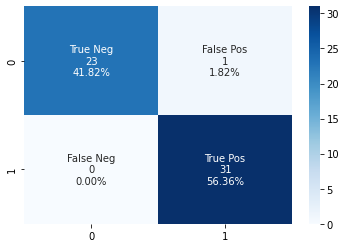

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_lr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_lr.flatten()/np.sum(cnf_matrix_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_lr, annot=labels, fmt='', cmap='Blues')

Η κλάση με ετικέτα 0 αναφέρεται στα δείγματα του dataset που δείχνουν έναν υγιή άνθρωπο και με ετικέτα 1 στα δείγματα ασθενών με ασθένεια Parkinson's. Επειδή πρόκεται για την ταξινόμηση με στόχο τη διάγωνση μίας ασθένειας, η μετρική που μας ενδιαφέρει περισσότερο η μετρική Recall για την ετικέτα 1, καθώς θέλουμε να αποφύγουμε τον χαρακτηρισμό ενός δείγματος ως "Υγιές", ενώ ο ασθενής πάσχει. Επομένως, θέλουμε να έχουμε όσο το δυνατόν λιγότερα False Negative δείγματα. Από τον πίνακα σύγχυσης φαίνεται πως είχαμε μηδενικά False Negative δείγματα, επομένως σε συνδυασμό με το πολύ μικρό πλήθος False Positive δειγμάτων, ο πίνακας σύγχυσης επιβεβαιώνει πως ο συγκεκριμένος estimator είναι κατάλληλος για την ταξινόμηση στο dataset.

####Gaussian Naive Bayes (χειρότερη επίδοση)

In [ ]:
cnf_matrix_gnb = confusion_matrix(test_labels, preds_gnb)

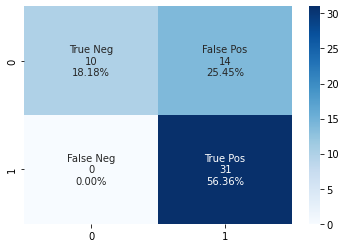

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_gnb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_gnb.flatten()/np.sum(cnf_matrix_gnb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_gnb, annot=labels, fmt='', cmap='Blues')

Και ο estimator με ταξινομητή τον Gaussian Naive Bayes έχει μηδενικά δείγματα False Negative, κάτι το οποίο είναι θετικό. Ωστόσο, ο συγκεκριμένος estimator παρουσίασε συγκριτικά με τους άλλους χαμηλό accuracy και F1, γεγονός που επιβεβαιώνεται και από τον πίνακα σύγχυσης, καθώς φαίνεται να υπάρχει σχετικά μεγάλο πλήθος False Positive δειγμάτων.

###Αποτελέσματα της βελτιστοποίησης

Παρακάτω φαίνεται ο αναλυτικός πίνακας των μετρικών "Accuracy" και "F1" όλων των ταξινομητών, καθώς και των χρόνων που χρειάστηκαν οι ταξινομητές για τις διαδικασίες του fit και του predict.

In [ ]:
print("{:<40} {:<30} {:<30} {:<30}".format('Classifier', 'Accuracy', 'F1', 'Time'))
label=[]
label2=[]
label3=[]
time=[]
num_ac=[]
num_f1=[]
columns=len(classifiers_accuracy)+len(opt_classifiers_accuracy)
for i in range (columns):
  for k, v in classifiers_accuracy.items():
      label.append(k)
      num_ac.append(v)
  for k, v in opt_classifiers_accuracy.items():
      label.append(k)
      num_ac.append(v)
  for m, l in classifiers_f1.items():
      label2.append(m)
      num_f1.append(l) 
  for m, l in opt_classifiers_f1.items():
      label2.append(m)
      num_f1.append(l)
  for t,r in classifiers_time.items():
      label3.append(t)
      time.append(r)
  for t,r in opt_classifiers_time.items():
      label3.append(t)
      time.append(r)
  print("{:<40} {:<30} {:<30} {:<30}".format(label[i], num_ac[i], num_f1[i], time[i]))

Classifier                               Accuracy                       F1                             Time                          
Uniform (random)                         0.5636363636363636             0.5862068965517241             0.0007486343383789062         
Constant 0                               0.43636363636363634            0.0                            0.0007612705230712891         
Constant 1                               0.5636363636363636             0.7209302325581396             0.0005514621734619141         
Most Frequent                            0.5636363636363636             0.7209302325581396             0.0005919933319091797         
Stratified                               0.509090909090909              0.6582278481012658             0.001013040542602539          
Gaussian Naive Bayes                     1.0                            1.0                            0.008821964263916016          
KNN with neighbours=3                    0.6181818181818182   

Παρατηρούμε ότι οι out of the box ταξινομητές χρειάζονται χρόνο πολλαπλάσια μικρότερο από τους optimized ταξινομητές. Ωστόσο, οι optimized ταξινομητές έχουν σημαντικά βελτιωμένη επίδοση σε σχέση με τους out of the box.

Παρακάτω φαίνεται το συγκριτικό bar plot για τα αποτελέσματα του Accuracy των out of the box ταξινομητών σε σχέση με τους ταξινομητές με τις βέλτιστες υπερπαραμέτρους.

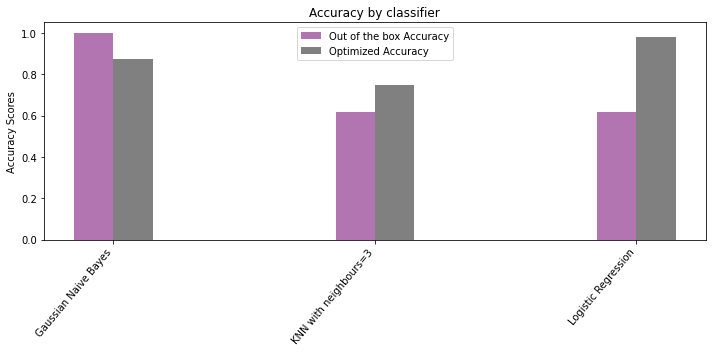

In [ ]:
import matplotlib.pyplot as plt

classifiers_all = list((classifiers_accuracy.keys()))

classifiers=[]
classifiers.append(classifiers_all[5])
classifiers.append(classifiers_all[6])
classifiers.append(classifiers_all[10])

opt_classifiers = list((opt_classifiers_accuracy.keys()))
plot_labels=classifiers

all_accuracy_values = list(classifiers_accuracy.values())
accuracy_values=[]
accuracy_values.append(all_accuracy_values[5])
accuracy_values.append(all_accuracy_values[6])
accuracy_values.append(all_accuracy_values[10])

opt_accuracy_values=list(opt_classifiers_accuracy.values())

x = np.arange (len(plot_labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, accuracy_values, width, color = (0.5,0.1,0.5,0.6), label='Out of the box Accuracy')
rects2 = ax.bar(x + width/2, opt_accuracy_values, width, color='gray', label='Optimized Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Scores')
ax.set_title('Accuracy by classifier')
ax.set_xticks(x)
ax.set_xticklabels(plot_labels, rotation=50, ha='right')
ax.legend()


fig.tight_layout()

plt.show()

Παρακάτω φαίνεται το συγκριτικό bar plot για τα αποτελέσματα της μετρικής F1 των out of the box ταξινομητών σε σχέση με τους ταξινομητές με τις βέλτιστες υπερπαραμέτρους.

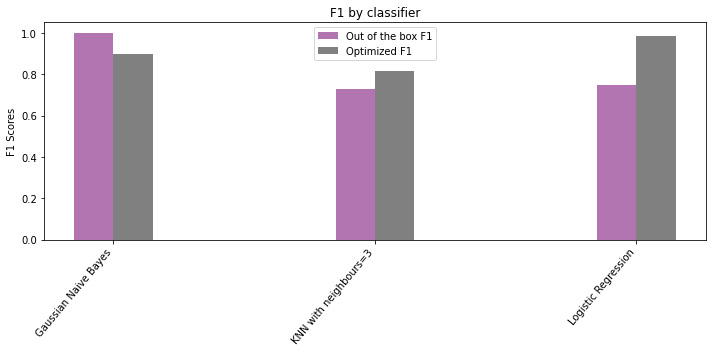

In [ ]:
import matplotlib.pyplot as plt

classifiers_all = list((classifiers_f1.keys()))

classifiers=[]
classifiers.append(classifiers_all[5])
classifiers.append(classifiers_all[6])
classifiers.append(classifiers_all[10])

opt_classifiers = list((opt_classifiers_f1.keys()))
plot_labels=classifiers

all_f1_values = list(classifiers_f1.values())
f1_values=[]
f1_values.append(all_f1_values[5])
f1_values.append(all_f1_values[6])
f1_values.append(all_f1_values[10])

opt_f1_values=list(opt_classifiers_f1.values())

x = np.arange (len(plot_labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, f1_values, width, color = (0.5,0.1,0.5,0.6), label='Out of the box F1')
rects2 = ax.bar(x + width/2, opt_f1_values, width, color='gray', label='Optimized F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Scores')
ax.set_title('F1 by classifier')
ax.set_xticks(x)
ax.set_xticklabels(plot_labels, rotation=50, ha='right')
ax.legend()


fig.tight_layout()

plt.show()

###Σχολιασμός αποτελεσμάτων:

Παρατηρούμε ότι τη βέλτιστη επίδοση (με βάση τις μετρικές Accuracy και F1) είχε ο ταξινομητής Logistic Regression μετά από την προεπεξεργασία των δεδομένων και τη βελτιστοποίηση των υπερπαραμέτρων, ενώ από τους βελτιστοποιημένους ταξινομητές, τη χαμηλότερη επίδοση είχε ο Gaussian Naive Bayes. Ωστόσο είναι σημαντικό να αναφερθεί πως και οι τρεις optimized ταξινομητές φάνηκε να είχαν υψηλό recall της ετικέτας 1, το οποίο είναι πολύ σημαντικό για ταξινόμηση που αφορά ιατρικές εφαρμογές.
Επιπλέον, από άποψη πολυπλοκότητας, ο βελτιστοποιημένος ταξινομητής kNN φάνηκε χρονικά να έχει τη μεγαλύτερη καθυστέρηση. 
Επομένως, ο καλύτερος ταξινομητής για το συγκεκριμένο πρόβλημα, φάνηκε να είναι ο Logistic Regression με τη βελτιωμένη αρχιτεκτονική, καθώς είχε τη βέλτιστη επίδοση (βλ. παραπάνω και σχολιασμό του αντίστοιχου πίνακα σύγχυσης) και σχετικά μικρή χρονική καθυστέρηση.